In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

torg_df = pd.read_csv("C:\Audiobooks\ForDS\\torg.csv", sep=";")
q = torg_df[['IP_PROP30', 'CP_QUANTITY']].groupby('IP_PROP30').sum().sort_values(by='CP_QUANTITY', ascending=False)['CP_QUANTITY']

([<matplotlib.patches.Wedge at 0x16082128850>,
 [Text(0.9189193248168086, 0.6046381351504557, ''),
  Text(-0.19151729822395805, 1.083199485081578, ''),
  Text(-1.010333291935984, 0.43500188414051505, ''),
  Text(-1.0536108225404741, -0.31607631139581766, ''),
  Text(-0.7358153146251817, -0.8176648596846051, ''),
  Text(-0.26576627339144626, -1.0674119579279704, ''),
  Text(0.2166787102851262, -1.0784481148897125, ''),
  Text(0.6049054646742491, -0.9187433693949747, ''),
  Text(0.8429779487593079, -0.7066740252093251, ''),
  Text(0.9529158567133744, -0.5495010191293696, ''),
  Text(1.0102826375036498, -0.4351195150285369, ''),
  Text(1.053977976387508, -0.31484984562501234, ''),
  Text(1.0833884154845428, -0.19044563842181278, ''),
  Text(1.0981525934312923, -0.06372504641133481, '')])

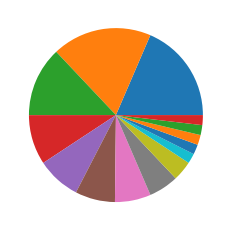

In [6]:
plt.pie(q)

## 6.9.2

В файле torg.csv представлена выгрузка со склада интернет-магазина.

Сгруппируйте размеры представленных товаров по суммарному количеству единиц товара на складе.

Учитывайте, что результат группировки (после применения итоговой функции) - обычный датафрейм, т.е. к нему применимы все обычные функции, например, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

Отсортируйте размеры по увеличению остатков на складе.

Если товаров одного размера одинаковое количество, то размеры сортируются "лексикографически" (да, мы не будем морочиться)


In [ ]:
torg_df

In [ ]:
import pandas as pd

torg_df = pd.read_csv("C:\Audiobooks\ForDS\\torg.csv", sep=";")
torg_df.groupby('IP_PROP32').sum().sort_values(by='CP_QUANTITY', ascending=True)

## 7

В этом задании представлена выгрузка складских остатков (выгрузка отличается от ранее представленной тем, что при каждом решении генерируется новая выгрузка из 200 позиций).

Найдите суммарную стоимость всех розовых (pink) вещей большого размера (XL).

Учитывайте, что цена указана за 1 единицу товара.

In [ ]:
import pandas as pd

torg_df = pd.read_csv("C:\Audiobooks\ForDS\dataset_345422_8.txt", sep=";")
res = torg_df[(torg_df.IP_PROP32 == "XL") & (torg_df.IP_PROP30 == 'pink')]
(res['CR_PRICE_1_USD'] * res['CP_QUANTITY']).sum()

In [ ]:
import pandas as pd
# можно прочитать файл как обычно
source_data = pd.read_csv('C:\Audiobooks\ForDS\export.csv', sep=';')
# и преобразовать колонку с датой и временем методами самого пандаса без лямбды и парсинга даты при чтении файла
source_data['IP_PROP5562'] = pd.to_datetime(source_data['IP_PROP5562'], format='%d.%m.%Y %H:%M:%S')
# и дату можно получить тоже без лямбды, т.е.  через метод datetime самого пандаса
source_data['date'] = source_data['IP_PROP5562'].dt.date

source_data[['date', 'IE_ID']].groupby('date').count().plot(kind='bar', figsize=(13,8))


В файле StudentsPerformance.csv представлен фрагмент выгрузки об абитуриентах. Информация разбита на категории:

    gender — пол абитуриента  (female - женщина, male - мужчина);
    race/ethnicity — национальность (зашифрована в виде значений "group A", "group B" и т.д.);
    parental level of education — уровень образования родителей;
    lunch — насколько качественно пообедал абитуриент перед тестом;
    test preparation course — закончил ли абитуриент подготовительные курсы;
    math score — оценка по математике;
    reading score — оценка по чтению;
    writing score — оценка по письму.

**Каково максимальное медианное значение оценки по чтению у групп, разделенных по признаку "пол абитуриента" и "национальность" ?

Выполните группировку по требуемым полям и введите ответ в виде целого числа.


In [ ]:
import pandas as pd
students = pd.read_csv('C:\Audiobooks\ForDS\StudentsPerformance.csv')
s = students.groupby(['race/ethnicity', 'gender']).aggregate({'reading score': 'median'}).sort_values(by='reading score')
students



**Какое среднее значение оценок по всем предметам у мальчиков из такой же группы с уровнем образования как у родителей девочек, получивших максимальную среднюю оценку по всем предметам?

Ответ округлите до одного знака после запятой.


In [ ]:
# 1й способ
students['mean_score'] = (students['math score'] + students['reading score'] + students['writing score']) / 3
fem = students[students.gender == "female"].groupby(['parental level of education'])['mean_score'].mean().sort_values()
males = students[(students['parental level of education'] == "bachelor's degree") & (students.gender == "male")].groupby(['parental level of education']).mean_score.mean()
males

In [ ]:
# 2й способ
f = students[students.gender == 'female'].groupby(['parental level of education'])
f.apply(lambda x: (x['math score'].mean() + x['reading score'].mean() + x['writing score'].mean()) / 3).sort_values()

In [ ]:
# 2й способ 2я часть
males = students[(students['parental level of education'] == "bachelor's degree") & (students.gender == 'male')].groupby(['parental level of education'])
males.apply(lambda x: (x['math score'].mean() + x['reading score'].mean() + x['writing score'].mean()) / 3)

## 8
Для этого задания используется случайно генерируемая выборка из 100 записей об использовании велодорожек Монреаля по датам. В выгрузке присутствуют данные только о 7 дорожках (в остальных пустые значения).

### Посчитайте среднюю посещаемость каждой велодорожки отдельно по дням недели.

### Какой день недели (в среднем) наиболее посещаем?

Используйте английские названия дней недели:

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Учитывайте, что в конкретной случайной выборке наиболее популярным может стать не только любой день недели, но и любая велодорожка!

 

Примечание. в этом уроке мы уже парсили датафрейм с датами. У объекта типа "дата" есть метод weekday(), который возвращает номер дня недели (число от 0 до 6).

In [8]:
from datetime import datetime
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dateparser = lambda x: datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv("C:\Audiobooks\ForDS\dataset_345422_14.txt", parse_dates=['Date'], date_parser=dateparser)
df

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,2012-04-23,623,NaN,315,544,1076,612,27,846,NaN
1,2012-06-23,3753,NaN,1326,1842,3992,1910,2585,4824,NaN
2,2012-04-30,3610,NaN,1572,2825,4675,2446,851,3541,NaN
3,2012-01-06,6097,NaN,2604,4110,7175,3895,1692,6595,NaN
4,2012-09-13,6520,NaN,3076,4369,7514,4494,1986,5742,NaN
...,...,...,...,...,...,...,...,...,...,...
95,2012-01-23,210,NaN,6,114,357,91,6,0,NaN
96,2012-04-21,533,NaN,212,398,710,408,50,755,NaN
97,2012-08-18,4427,NaN,1333,2505,3866,1864,1229,4359,NaN
98,2012-03-25,520,NaN,243,309,691,427,145,723,NaN


In [10]:
df = df.dropna(axis=1, how='all')
df

,Date,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
0,2012-04-23,623,315,544,1076,612,27,846
1,2012-06-23,3753,1326,1842,3992,1910,2585,4824
2,2012-04-30,3610,1572,2825,4675,2446,851,3541
3,2012-01-06,6097,2604,4110,7175,3895,1692,6595
4,2012-09-13,6520,3076,4369,7514,4494,1986,5742
...,...,...,...,...,...,...,...,...
95,2012-01-23,210,6,114,357,91,6,0
96,2012-04-21,533,212,398,710,408,50,755
97,2012-08-18,4427,1333,2505,3866,1864,1229,4359
98,2012-03-25,520,243,309,691,427,145,723


In [5]:
df['weekday'] = df.Date
for i in range(len(df['weekday'])):
    df['weekday'][i] = days[df['weekday'][i].weekday()]
df_mean = df.groupby(['weekday']).aggregate('mean')

####
df_sum = df_mean.sum(axis='columns')
df_sum.idxmax()

<ipython-input-5-ea33cb01608e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'][i] = days[df['weekday'][i].weekday()]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


'Thursday'

# ! НЕ МОЕ решение. разобраться

In [6]:
# ! НЕ МОЕ решение. разобраться

df['Date'] = pd.to_datetime(df['Date'])
# получим название недели
df = df.assign(weekday=df['Date'].dt.day_name())

# средняя посещаемость каждой велодорожки отдельно по дням недели
df_mean = df.groupby(by=['weekday']).mean()

df_sum = df_mean.sum(axis="columns")
df_sum.idxmax()

'Thursday'

## 9


В файле football_players.csv представлен фрагмент выгрузки датасета о футболистах.

Посчитайте среднюю и медианную зарплату "Wage" футболистов из разных клубов "Club".

В скольких клубах средняя и медианная зарплаты совпадают?


In [34]:
df = pd.read_csv("C:\Audiobooks\ForDS\\football_players.csv")
avg_df = df.groupby(['Club']).aggregate({'Wage': ['mean', 'median']})

avg_df[avg_df['Wage']['mean'] == avg_df['Wage']['median']].count()

Wage  mean      52
      median    52
dtype: int64

## 10
#### Посчитайте количество организаций (CompanyID), у которых суммарный объем файлов (FileSize) хотя бы одного проекта (ProjectID) превышает средний объем файлов по всем проектам.

Описание полей датасета:

    ProjectID (число) - id проекта в рамках которого загружен файл, привязка к элементам другой таблицы
    UserID (число) - id пользователя, загрузившего файл, привязка к элементам другой таблицы
    uploadServerUnixTime (число) - время загрузки файла на сервер в формате UnixTime
    CompanyID (число) - id организации которой принадлежит пользователь, привязка элемента другой таблицы
    FileSize (число) - размер файла в байтах
    TypeDocs (строка) - раздел в который загружен файл


In [38]:
df = pd.read_csv("C:\Audiobooks\ForDS\dataset_file_storage.csv", sep=";")
df

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
0,753919,27549,1582272443,753918,732686,6.Юридические документы
1,726628,26990,1582216416,726615,2484373,8.Другие документы
2,705607,26912,1571732077,703124,22,1.Основные документы
3,705605,26912,1571048621,703124,4,1.Основные документы
4,705605,26912,1570799210,703124,1030735,1.Основные документы
...,...,...,...,...,...,...
1847,753919,27549,1582192195,753918,51551,3.Материалы для KYC
1848,749900,27543,1582622968,749892,106970,6.Юридические документы
1849,755110,27557,1582800974,755109,112834,8.Другие документы
1850,741922,26996,1581317108,741921,138990,6.Юридические документы


In [69]:
max_project_size = df.groupby(['CompanyID', 'ProjectID'])['FileSize'].sum().groupby(['CompanyID']).max()
mean_project_size = df.groupby(['ProjectID'])['FileSize'].sum().mean()
max_project_size[max_project_size > mean_project_size].count()


14

### На какую сумму купили и оплатили носков любых видов (как мужских, так и женских)?

P.S. В рамках задачи гольфы != носки =)


In [4]:
orders = pd.read_csv("C:\Audiobooks\ForDS\\orders.csv", sep=';')
orders

,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество
0,09.11.2019 21:55:51,9,10,"Принят, ожидается оплата",Нет,Нет,Нет,103,5
1,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,86,100
2,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,104,10
3,09.11.2019 12:50:07,7,8,"Принят, ожидается оплата",Нет,Нет,Нет,104,7
4,09.11.2019 12:00:00,6,1,"Принят, ожидается оплата",Нет,Нет,Нет,104,5
5,09.11.2019 12:00:00,6,1,"Принят, ожидается оплата",Нет,Нет,Нет,103,5
6,08.11.2019 08:36:22,5,5,Отменён,Нет,Да,Нет,124,1
7,08.11.2019 08:36:22,4,9,"Принят, ожидается оплата",Нет,Нет,Да,91,1
8,08.11.2019 08:36:22,3,8,"Оплачен, формируется к отправке",Да,Нет,Нет,103,3
9,08.11.2019 08:36:22,3,8,"Оплачен, формируется к отправке",Да,Нет,Нет,104,3


In [17]:
products = pd.read_csv("C:\Audiobooks\ForDS\\Products.csv", sep=';')
socks = products[products['Name'].str.contains('Носки') | products['Name'].str.contains('носки')]
socks

,Product_ID,Name,Price,CURRENCY
5,86,"Носки Простые, муж",45,RUR
6,91,"Носки Честные, муж",50,RUR
7,103,"Носки Подарочные, муж",199,RUR
8,104,"Носки Подарочные, жен",249,RUR
9,124,Носки беговые Camino,999,RUR


In [32]:
socks_sold = pd.merge(orders, socks, how='inner', left_on="ID товара", right_on="Product_ID")
socks_sold_OK = socks_sold[socks_sold['Статус'].isin(['Оплачен, формируется к отправке', 'Выполнен'])]
#socks_sold_OK = socks_sold[(socks_sold['Статус'] == 'Оплачен, формируется к отправке') | (socks_sold['Статус'] == 'Выполнен')]

socks_sold_OK

,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество,Product_ID,Name,Price,CURRENCY
2,08.11.2019 08:36:22,3,8,"Оплачен, формируется к отправке",Да,Нет,Нет,103,3,103,"Носки Подарочные, муж",199,RUR
4,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,86,1,86,"Носки Простые, муж",45,RUR
8,08.11.2019 08:36:22,3,8,"Оплачен, формируется к отправке",Да,Нет,Нет,104,3,104,"Носки Подарочные, жен",249,RUR


In [33]:
total = (socks_sold_OK['Price'] * socks_sold_OK['Количество']).sum()
total

1389

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline